> # Ataque ao RSA
Disciplina: Álgebra e Criptografia, EMAp/FGV - 2021.2 <br>
Professor: Luciano Guimarães Monteiro de Castro <br>
Alunos: Carlos Eduardo Alves Pereira e Tarla Lemos de Andrade


### Sumário

1. [Decodificando uma mensagem RSA](#1)
2. [Porque o RSA é seguro?](#3)
3. [Métodos de ataque ao RSA](#5)
4. [Ataque ao RSA na prática](#2)
6. [Referências](#6)


<a id='1'></a>
### Decodificando uma mensagem RSA 

Para codificar uma mensagem usando criptografia RSA são seguidos os seguintes passos:

1. Primeiro se escolhe as chaves de codificação $n$ e $e$, onde:<br>
    * $n$ é o produto de dois primos grandes (sejam eles $p$ e $q$);<br>
    * $e$ é um inteiro tal que $mdc(e,\phi(n))=1$ <br> <br>
    
2. A mensagem é quebrada em blocos $b_i$ menores que $n$; 
<br>
3. Cada bloco é elevado ao expoente $e$ e encontramos sua forma reduzida $a$ no módulo $\phi(n)$: $~~b^e \equiv a ~ (mod~ \phi(n))$


A junção destes blocos codificados $a_i$ é a mensagem codificada pelo RSA. <br>

Se conseguirmos encontrar um expoente $d$ que seja o inverso de $e$ módulo $\phi(n)$, ou seja, $ed = 1+k\phi(n)$, considerando módulo $p$ temos:

$$b^{ed} \equiv b^{1+k\phi(n)} \equiv b^{1+k(p-1)(q-1)}\equiv b(b^{(p-1)})^{k(q-1)} ~~~ (mod~p)$$

Pelo teorema de Fermat, assumindo que $p \nmid b$, vale que $b^{p-1} \equiv 1 ~~~(mod~p)$. Desta forma, obtemos:
$$b^{ed} \equiv b ~~~(mod~p)$$
Aqui, se $p\mid b$, então $b^{ed} \equiv 0 ~~ (mod~p)$ e a equivalência continua valendo.

Isto significa que se elevarmos a mensagem criptografada ao expoente $d$ módulo $p$, obtemos a mensagem inicial. 
    

<a id='3'></a>
### Por que o RSA é seguro?

Apesar da ideia de ataque ser simples : encontrar o inverso do expoente $e$ conhecido no módulo $\phi(n)$, não é uma tarefa barata computacionalmente, dependendo da escolha dos valores de $p,q$ e $e$.

Para encontrar $\phi(n)$ deve-se conhecer os valores de $p$ e $q$. Como só conhecemos $n$, é preciso usar um algoritmo de fatoração. É aqui que se encontra a maior dificuldade, já que para primos $p$ e $q$ muito grandes é preciso um grande poder computacional para resolver o problema, demandando muito tempo e tornando inviável o ataque.

<a id='5'></a>
### Métodos de ataque ao RSA

Foram desenvolvidos diversos métodos ao longo dos anos para atacar o RSA. Dentre eles vamos conhecer três classes de métodos e implementar os algoritmos de Fermat e Pollard p-1.

* Cíclico    
    O ataque cíclico consiste em iterar até encontrar um $k$ que satisfaça $c^{e^k} \equiv c ~~(mod~n)$, sendo $b$ a mensagem e $c = b^e$ a mensagem criptografada. Então, para este $k$, vale $c^{e^{k-1}} \equiv b ~~(mod~n)$. É provada a existência de $k$, porém é um ataque com este método não é usado na prática devido à dificuldade computacional em verificar se $c^{e^k}\equiv c$, e assim passa a ser menos eficiente que os algoritmos de fatoração. 
    
    <p> Dada a equivalência $c^{e^{k-1}} \equiv b ~~(mod~n)$, se elevarmos ambos os lados por $e$ temos $(c^{e^{k-1}})^e \equiv b^e ~~(mod~n)$ e então $(c^{e^{k-1}})^e \equiv c ~~(mod~n)$.</p>
    <p></p>

* Wiener
    <p>  &nbsp; &nbsp; É um método que usa frações contínuas para fazer o ataque.

    <p> Sabendo que $ed-k\phi(n)=1$, então $|\dfrac{e}{\phi(n)}-\dfrac{k}{d}|=\dfrac{1}{d\phi(n)}$. Com $p$ e $q$ grandes, $\dfrac{1}{d\phi(n)}$ é um valor pequeno, ou seja,$\dfrac{k}{d}$ tende a ser uma boa aproximação para $\dfrac{e}{\phi(n)}$. </p>

    <p>O teorema de Wiener enuncia que dado $n = pq$ com $p<q<2p$ e seja $d<\dfrac{1}{3}n^{\dfrac{1}{4}}$ e $ed=1$ módulo $\phi(n)$, $d$ pode ser encontrado em $\dfrac{k}{d}$ nos convergentes de $\dfrac{e}{n}$. Aqui, números convergentes são os números racionais da expansão de uma fração contínua</p>.
    <p></p>
* Fatoração:
    <p> &nbsp; &nbsp; Este tipo de método busca encontrar quem são os fatores primos de <b>n</b>, ou seja, quem são <b>p</b>, <b>q</b>. Em geral, após obter esses fatores, calcula-se $\varphi(n)=(p-1)(q-1)$ e aplica-se o algoritmo de Euclides Estendido (recebendo $\varphi$ e <b>e</b> como entradas) que retornará <b>d</b>.</p>
    <p> </p>
    
    * Fermat
    
    <p> &nbsp; &nbsp; &nbsp; Se baseia no fato de que $n = p q$ é um número composto ímpar. Assim, podemos escrever $n = p q = (\frac{p+q}{2})^2 - (\frac{p-q}{2})^2 = x^2 - y^2 = (x-y)(x+y)$. Ele se mostra eficiente quando ambos os fatores são próximos da raiz quadrada de $n$ .</p>
    <p> </p>
    
    * Pollard
    <p>Seja $n=pq$, com $p$ e $q$ primos. Euler-Fermat garante que $a^{p-1} \equiv 1 ~(mod~p) $ para todo $a$ primo com $p$. Suponha que $p-1$ é um fator de $L$. Então $a^L \equiv a^{(p-1)k} \equiv 1~(mod~p)$, e assim, $p$ divide $a^L-1$. Uma vez que $p$ é fator de $n$, o mdc de $a^L-1$ e $n$ é um múltiplo de $p$. Como encontrar $L$? Escolhemos um número primo com $n$ e vamos avaliar $a^{k!}$ para $k=1,2,3...$. Agora, encontramos o mdc de $a^{k!}-1~mod(n)$ e $n$, este mdc é o fator de $n$</p>


<a id='2'></a>
### Ataque ao RSA na prática

In [1]:
import numpy
import math
import pandas as pd
import matplotlib.pyplot as plt

Para a melhor visualização do processo de ataque à criptografia RSA optamos por implementar o algoritmo do RSA ao invés de usarmos a biblioteca do Python. A implementação se encontra no arquivo _RSA.py_.

In [2]:
import RSA

Para a pré-codificação da mensagem , ou seja, para transformar os caracteres em códigos, usamos os seguintes dicionário:

In [3]:
preCodificador,posDecodificador = RSA.dict_codificador()
#preCodificador

Agora basta escolher a mensagem para ser enviada sigilosamente que a função _cripto_RSA()_ irá criptografá-la:

In [26]:
mensagem = input()

Localização da área 51: Condado de Lincoln, Nevada, Força Aérea dos Estados Unidos - 37° 14' 06" N 115° 48' 40" O


In [27]:
msg_criptografada,p,q,e,n = RSA.cripto_RSA(mensagem,preCodificador)
#56248799, 7878569899, 845653
#1063, 9181, 257
#337, 241,61

Digite o valor de p: 
337
Digite o valor de q: 
241
Digite o valor de e: 
61

 Então a chave de codificação é 
n : 81217
e : 61


E agora sua mensagem foi transformada e se alguém interceptá-la verá o código a seguir, que passado pelo dicionário de codificação exibirá esta mensagem sem sentido:

In [28]:
print(msg_criptografada)
#RSA.dict_decodificador(msg_criptografada,posDecodificador)
RSA.decodificador(msg_criptografada,1,n,posDecodificador)

[13515, 32433, 20697, 14252, 19680, 17766, 75302, 22466, 47756, 37625, 11102, 53834, 8234, 31680, 69811, 60180, 70177, 45349, 44070, 53834, 72225, 26795, 46584, 69456, 13515, 40197, 21012, 12815, 1, 8234, 47869, 7179, 53421, 36808, 60180, 74049, 17766, 75302, 40197, 78304, 56813, 56634, 40197, 22008, 46584, 13515, 3333, 23171, 28368, 80861, 8234, 39385, 50240, 38175, 75302, 30038, 22152, 26591, 44070, 21458, 12783, 12131, 15350, 31680, 69811, 58054, 8234, 47869, 64603, 27210, 9245, 79876, 60794, 1, 8234, 47869, 11455, 54040, 13515, 40197, 50605, 8234, 56813, 64916, 10341, 46584, 80252, 63888, 60180, 51855, 16748, 66533, 37299, 25413, 72289, 77655, 51216, 53834, 80416, 36275, 11805, 58054, 35961, 35840, 39792, 25534, 11805, 7096, 13515, 48436]


'8q***f***********J******P**ª**************²àU**Ì**`*é**^*********************1***Ì****[****p*****0*éO****v************(********²**Ì*9**********&***********í*****R*******û*R**8r*'

Agora vamos tentar descobrir a mensagem sem saber a chave de decodificação com cada algoritmo:

## <span style="color:gray">Algoritmo Fermat</span>

In [12]:
def algoritmoFermat(n):
    if n%2 == 0:
        return([2,int(n/2)])
    x = math.ceil(math.sqrt(n))
    if n == x**2:
        return ([x,x]) 
    y = x**2 - n 
    z = int(math.sqrt(y)) 
    while z**2 != y: 
        x += 1
        y = x**2 - n 
        z = int(math.sqrt(y))
    return(x-z,x+z)

Com o algoritmo de Fermat é possível fatorar $n$ e assim fica fácil encontrar $\phi(n)$ para decriptografar a mensagem:

In [29]:
p,q = algoritmoFermat(n)
print("p:",p)
print("q:",q)

p: 241
q: 337


Com $p$ e $q$ conhecidos, vamos encontrar o inverso de $e$ no módulo $\phi(n)$, ou seja, o expoente decodificador.<br>
Para isto, basta usar o algoritmo de Euclides estendido:

In [30]:
mdc,x,d = RSA.EuclidesEstendido((p-1)*(q-1), e)
print("Expoente decodificador(d) =",d)

Expoente decodificador(d) = 40981


E agora que temos a chave privada, é só decriptografar a mensagem:

In [31]:
msg = RSA.decodificador(msg_criptografada,d,n,posDecodificador)
print("Mensagem interceptada:",msg)

Mensagem interceptada: Localização da área 51: Condado de Lincoln, Nevada, Força Aérea dos Estados Unidos - 37° 14' 06" N 115° 48' 40" O


## <span style="color:gray">Método Pollard p-1</span>

In [16]:
def pollard(n): 
    a = 2 #base geralmente usada 
    i = 2 #expoente
   
    while(True):  
        a = (a**i) % n  
        p = math.gcd((a-1), n)
        if (p > 1):  
            q = n//p
            return p , q
            break 
        i += 1

Com o método Pollard p-1 fatoramos $n$:

In [32]:
p, q = pollard(n)
print("p:",p)
print("q:",q)

p: 241
q: 337


Decodificando a mensagem:

In [33]:
mdc,x,d = RSA.EuclidesEstendido((p-1)*(q-1), e)
print("Expoente decodificador(d) =",d,"\n")
msg = RSA.decodificador(msg_criptografada,d,n,posDecodificador)
print("Mensagem interceptada:",msg)

Expoente decodificador(d) = 40981 

Mensagem interceptada: Localização da área 51: Condado de Lincoln, Nevada, Força Aérea dos Estados Unidos - 37° 14' 06" N 115° 48' 40" O


## <span style="color:gray">Performance de cada algoritmo</span>

A fatoração de Fermat tem melhor desempenho quando os primos $p$ e $q$ são próximos:

In [20]:
from datetime import datetime
primos = numpy.loadtxt("primos.csv", dtype ='int64')

In [ ]:
#Primos maiores
ps = numpy.array([], dtype='int64')
qs = numpy.array([], dtype='int64')
tf = []
tp = []

#escolhendo primos
aux = math.floor(len(primos)/100)
for i in range(50):
    ps = numpy.concatenate((ps,primos[numpy.random.randint(aux*i,aux*(i+1),2)]))
    qs = numpy.concatenate((qs,primos[numpy.random.randint(aux*i,aux*(i+1),2)]))
       
ns = ps*qs
dist = abs(ps-qs)

ctrl = 0
for n in ns:
    start_time = datetime.now()
    p,q = pollard(int(n))
    end_time = datetime.now()
    tp.append(end_time-start_time)
    
    #start_time = datetime.now()
    #p,q = algoritmoFermat(int(n))
    #end_time = datetime.now()
    #tf.append(end_time-start_time)  
    

In [21]:
#Primos menores
d1 = [] 
tf = []
Pl =[]
Ql =[]
tp=[]
for i in range(1,100):
    p = primos[500+i]
    q = primos[500-i]
    n = int(p*q)
    e = int(primos[50])
    
    d1.append(p-q)
    Pl.append(p)
    Ql.append(q)
   
    start_time = datetime.now()
    p,q = algoritmoFermat(n)
    end_time = datetime.now()
    
    tf.append(end_time-start_time)
    
    start_time = datetime.now()
    p,q = pollard(int(n))
    end_time = datetime.now()
    tp.append(end_time-start_time)
    

In [34]:
#Transforamndo o tempo de microsegundo para segundo*10^6
Tf=[tf[i].total_seconds()*10**6 for i in range(len(tf))]
Tp=[tp[i].total_seconds()*10**6 for i in range(len(tp))]

#### Mostrando como o algoritmo de Fermat se comporta em relação a distância existente entre os primos

<function matplotlib.pyplot.show>

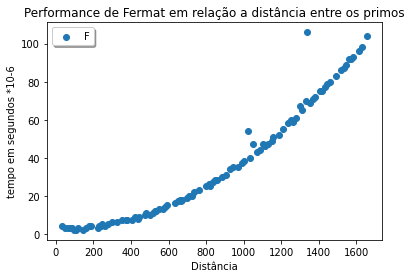

In [67]:
plt.scatter(d1,Tf)
plt.xlabel('Distância')
plt.ylabel('tempo em segundos *10-6')
plt.legend('Fermat', shadow=True)
plt.title('Performance de Fermat em relação a distância entre os primos')
plt.show

#### Comparativo entre os tempos do algoritmo de Pollard p-1 e o de Fermat

<function matplotlib.pyplot.show>

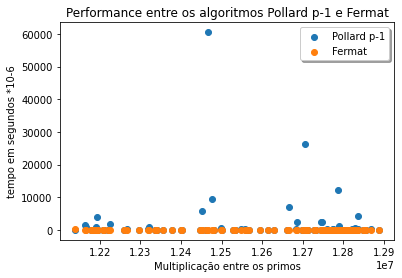

In [87]:
ns=[abs(Ql[i]*Pl[i]) for i in range(len(Ql))]
plt.scatter(ns[0:len(Tp)],Tp)
plt.scatter(ns[0:len(Tf)],Tf)
plt.xlabel('Multiplicação entre os primos')
plt.ylabel('tempo em segundos *10-6')
plt.legend(('Pollard p-1', 'Fermat'), shadow=True)
plt.title('Performance entre os algoritmos Pollard p-1 e Fermat')
plt.show

<a id='6'></a>
### Referências

* Coutinho S. C., Números Inteiros e Criptografia RSA
* Alfred J. Menezes, Paul C. van Oorschot and Scott A. Vanstone, A Handbook of Applied Cryptography
* winer's attack. Disponível em: https://en.wikipedia.org/wiki/Wiener%27s_attack